In [2]:
# Data organizer
import numpy as np
import pandas as pd
import tidytcells as tt
import pickle
import Levenshtein
import matplotlib.pyplot as plt
import random
# load MIRA raw data
filepath = 'seqs/'
filename = 'peptide-detail'
data = pd.read_csv(filepath + filename + '.csv')

In [3]:
def Self_Pairs(out,d):
    pairs = []
    for k, seqs in enumerate(out):
        N = len(seqs)
        for i in range(N-1):
            p1 = seqs[i]
            for j in range(i+1,N):
                p2 = seqs[j]
                if p1[1] == p2[1]:
                    d2 = Levenshtein.distance(p1[0],p2[0]) 
                    if d2 == d:
                        pairs.append([k,p1[0],p1[1],p2[0],p2[1],d])
    return pairs
def Cross_Pairs(out_trim,d):
    N = len(out_trim)
    pairs = []
    for i in range(N):
        seqs1 = out_trim[i]
        for j in range(i+1,N):
            seqs2 = out_trim[j]
            for s1 in seqs1:
                for s2 in seqs2:
                    if s1[1] == s2[1]:
                        d2 = Levenshtein.distance(s1[0],s2[0])
                        if d2 == d:
                            pairs.append(['c',s1[0],s1[1],s2[0],s2[1],d])
    return pairs
def decomp_df(data):
    ep = list(data['Epitope'])
    s1 = list(data['Seq1'])
    v1 = list(data['Vgene1'])
    j1 = list(data['Jgene1'])
    d_in = list(zip(s1,v1,j1,ep))
    out = []
    for i in list(set(ep)):
        temp = []
        for x in d_in:
            if x[3] == i:
                temp.append(x[:3])
        out.append(temp)
    return out

In [ ]:
####### pair statistics ########

Text(0, 0.5, 'PDF')

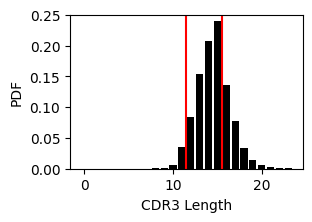

In [9]:
BioID = list(data['TCR BioIdentity'])
Epi = list(data['Amino Acids'])
out_all = []
for i in range(len(BioID)):
    BID = BioID[i].split('+')
    Ep = Epi[i]
    out_all.append([BID[0], BID[1],BID[2],Ep]) # [CDR3b, Vgene, Jgene, epitope]
Ep_set = list(set(Epi))
out_sort = []
for erp in Ep_set:
    temp = []
    for BBD in out_all:
        if erp == BBD[3]:
            temp.append((BBD[0],BBD[1],BBD[2]))
    temp = list(set(temp))
    out_sort.append(temp)
L_CDR3 = []
for i, x in enumerate(out_sort):
    temp = [len(y[0]) for y in x]
    L_CDR3.append(temp)
    h, _ = np.histogram(temp,bins=list(range(25)))
    if i == 0:
        h_all = h
    if i != 0:
        h_all = h_all + h
plt.figure(figsize=(3,2))
plt.bar(list(range(24)),h_all/np.sum(h_all),color='k')
plt.plot([11.5,11.5],[0,0.25],'r-')
plt.plot([15.5,15.5],[0,0.25],'r-')
plt.ylim([0,0.25])
plt.xlabel('CDR3 Length')
plt.ylabel('PDF')

In [ ]:
####### load resampled sequences and find pairs ########

In [10]:
Rep = 15
for r in range(1):
    # self pairs
    print('Rep ' + str(r+1) + ':')
    for d in [1]:#range(1,7):
        out_test = decomp_df(pd.read_csv('seqs/MIRA_test_seqs_' + str(r) + '.csv'))
        #########################
        Spairs_test =  Self_Pairs(out_test,d)
        ep = [a[0] for a in Spairs_test]
        s1 = [a[1] for a in Spairs_test]
        s2 = [a[3] for a in Spairs_test]
        dict = {'epitope': ep, 'Seq1': s1, 'Seq2': s2}
        df = pd.DataFrame(dict)
        df.to_csv('seqs/Pairs_MIRA_test_1000_LD_'+ str(d) + '_' + str(r) + '.csv')
        print('number of test self pairs: ' + str(len(Spairs_test)))

        Cpairs_test =  Cross_Pairs(out_test,d)
        s1 = [a[1] for a in Cpairs_test]
        s2 = [a[3] for a in Cpairs_test]
        dict = { 'Seq1': s1, 'Seq2': s2}
        df = pd.DataFrame(dict)
        df.to_csv('Seqs/Bkg_MIRA_Pairs_test_1000_LD_'+ str(d)+ '_' + str(r) + '.csv')
        print('number of test cross pairs: ' + str(len(Cpairs_test)))
        ########################
        if d == 1:
            out_train = decomp_df(pd.read_csv('seqs/MIRA_train_seqs_'+str(r)+'.csv'))
            Spairs_train =  Self_Pairs(out_train,d)
            ep = [a[0] for a in Spairs_train]
            s1 = [a[1] for a in Spairs_train]
            s2 = [a[3] for a in Spairs_train]
            dict = {'epitope': ep, 'Seq1': s1, 'Seq2': s2}
            df = pd.DataFrame(dict)
            df.to_csv('seqs/Pairs_MIRA_train_1000_LD_'+ str(d) + '_' + str(r)+'.csv')
            print('number of train self pairs rep ' + str(r+1) + ': ' + str(len(Spairs_train)))

            Cpairs_train =  Cross_Pairs(out_train,d)
            s1 = [a[1] for a in Cpairs_train]
            s2 = [a[3] for a in Cpairs_train]
            dict = {'Seq1': s1, 'Seq2': s2}
            df = pd.DataFrame(dict)
            df.to_csv('seqs/Bkg_MIRA_Pairs_train_1000_LD_'+ str(d) + '_' + str(r)+'.csv')
            print('number of train cross pairs rep ' + str(r+1) + ': ' + str(len(Cpairs_train)))

Rep 1:
number of test self pairs: 1300
number of test cross pairs: 462
number of train self pairs rep 1: 3931
number of train cross pairs rep 1: 2093
